El consumo energetico anual total no se
incrementa a pesar de incrementarse el número de
dispositivos electricos debido a la mejora de la
eficiencia energetica ​



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from io import StringIO
import seaborn as sns
import matplotlib.dates as mdates
from scipy.stats import pearsonr
import statsmodels.api as sm

In [2]:
# Cargar el dataset
df = pd.read_csv('../Data/dataset_limpio.csv', parse_dates=['time'])

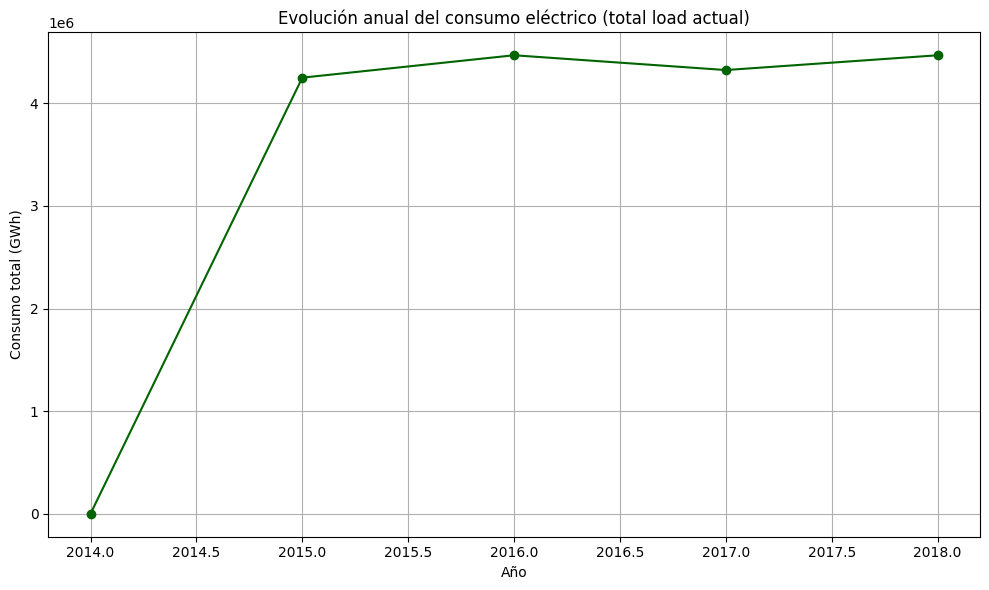

In [6]:
# Asegurar que la columna de tiempo es datetime
df["time"] = pd.to_datetime(df["time"])

# Extraer el año
df["Año"] = df["time"].dt.year

# Agrupar por año y sumar el consumo real (en MWh)
df_anual = df.groupby("Año")["total load actual"].sum().reset_index()

# Convertir a GWh para legibilidad
df_anual["Consumo_GWh"] = df_anual["total load actual"] / 1000

# Gráfico de evolución anual
plt.figure(figsize=(10, 6))
plt.plot(df_anual["Año"], df_anual["Consumo_GWh"], marker='o', linestyle='-', color='darkgreen')
plt.title("Evolución anual del consumo eléctrico (total load actual)")
plt.xlabel("Año")
plt.ylabel("Consumo total (GWh)")
plt.grid(True)
plt.tight_layout()
plt.show()

In [12]:
datos = {
    "Año": list(range(2010, 2025)),
    "Consumo_GWh": [
        275736, 270022, 266860, 260598, 257720,
        262808, 264666, 267867, 268886, 264664,
        250051, 256546, 250516, 245033, 248811
    ]
}

df_consumo = pd.DataFrame(datos)
print(df_consumo)

     Año  Consumo_GWh
0   2010       275736
1   2011       270022
2   2012       266860
3   2013       260598
4   2014       257720
5   2015       262808
6   2016       264666
7   2017       267867
8   2018       268886
9   2019       264664
10  2020       250051
11  2021       256546
12  2022       250516
13  2023       245033
14  2024       248811


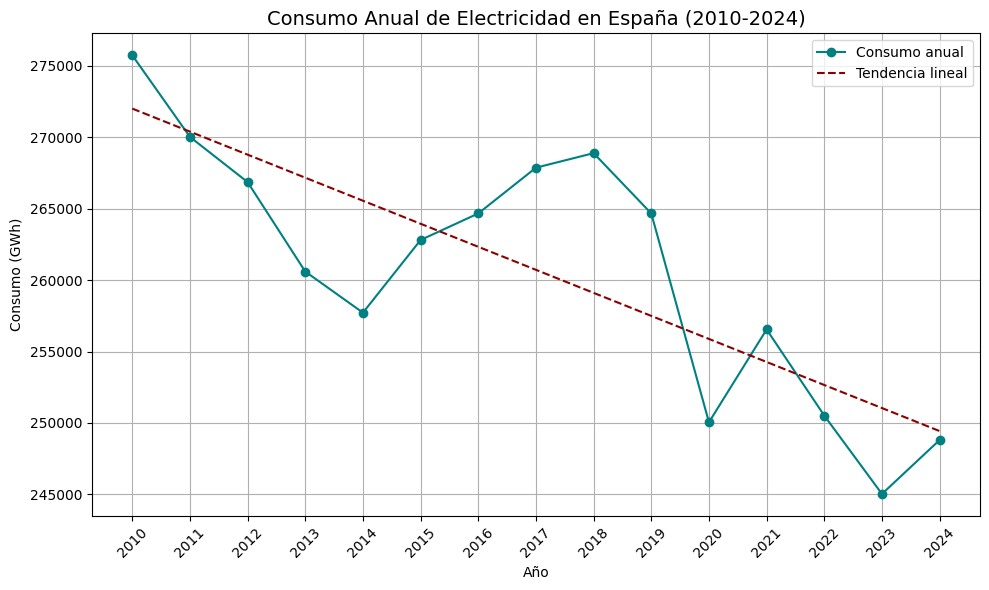

In [14]:

df = pd.DataFrame(datos)

# Ajustar una línea de tendencia lineal (regresión)
x = df["Año"]
y = df["Consumo_GWh"]
coef = np.polyfit(x, y, 1)  # Grado 1 para línea recta
polinomio = np.poly1d(coef)
tendencia = polinomio(x)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(x, y, marker='o', linestyle='-', color='teal', label='Consumo anual')
plt.plot(x, tendencia, linestyle='--', color='darkred', label='Tendencia lineal')

# Añadir etiquetas y leyenda
plt.title("Consumo Anual de Electricidad en España (2010-2024)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Consumo (GWh)")
plt.grid(True)
plt.xticks(x, rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

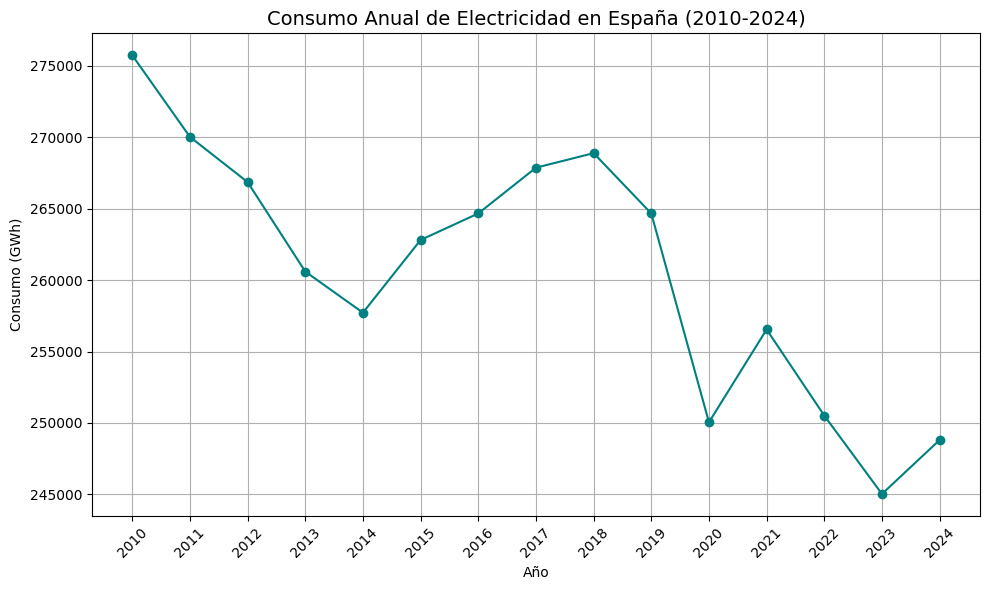

In [13]:
# Crear DataFrame
df_consumo = pd.DataFrame(datos)

# Crear la gráfica
plt.figure(figsize=(10, 6))
plt.plot(df_consumo["Año"], df_consumo["Consumo_GWh"], marker='o', linestyle='-', color='teal')
plt.title("Consumo Anual de Electricidad en España (2010-2024)", fontsize=14)
plt.xlabel("Año")
plt.ylabel("Consumo (GWh)")
plt.grid(True)
plt.xticks(df_consumo["Año"], rotation=45)
plt.tight_layout()
plt.show()

In [8]:
consumo_anual = [
    (2010, 244750.67),
    (2011, 243469.70),
    (2012, 240200.78),
    (2013, 230025.23),
    (2014, 226822.28),
    (2015, 231954.98),
    (2016, 232429.35),
    (2017, 239070.73),
    (2018, 238431.11),
    (2019, 234508.85),
    (2020, 219589.64),
    (2021, 227799.83),
    (2022, 250424.77),
    (2023, 244665.00),
    (2024, 248811.00)
]

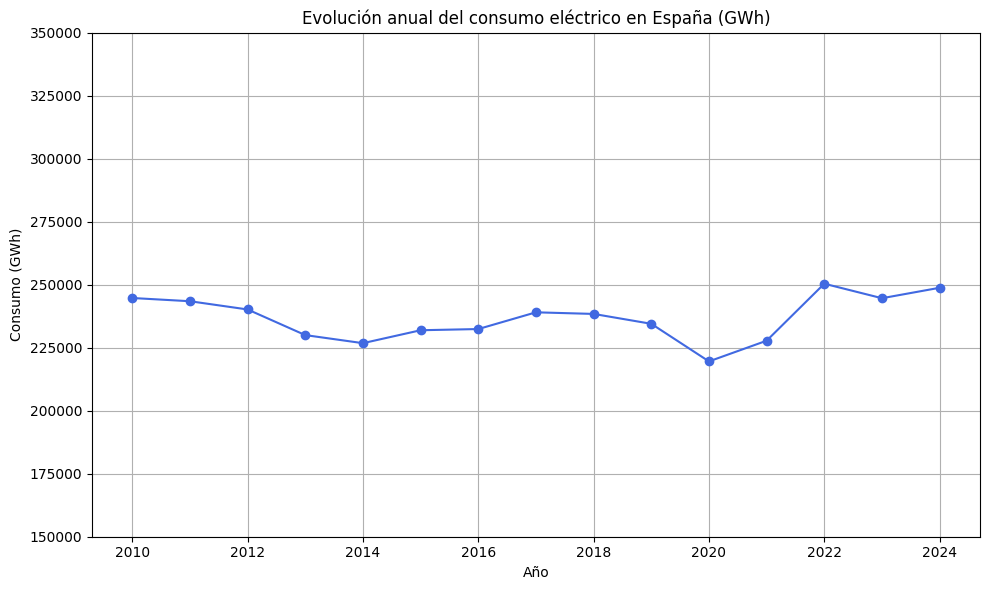

In [11]:
# Crear DataFrame
df_consumo_anual = pd.DataFrame(consumo_anual, columns=["Año", "Consumo_GWh"])

# Graficar evolución
plt.figure(figsize=(10, 6))
plt.plot(df_consumo_anual["Año"], df_consumo_anual["Consumo_GWh"],
         marker='o', linestyle='-', color='royalblue')

plt.title("Evolución anual del consumo eléctrico en España (GWh)")
plt.xlabel("Año")
plt.ylabel("Consumo (GWh)")
plt.ylim(150000, 350000)  # <-- Rango personalizado del eje Y
plt.grid(True)
plt.tight_layout()
plt.show()